# Predicting the value of players in FIFA 19 using KNN 
---
Written by Neil Mackenzie

# Introduction

Following a [project](https://github.com/NeilMackenzie39/Predicting-Car-Prices-using-KNN) on the use of KNN to predict car prices, I decided to try combining the use of machine learning with one of my passions: soccer. In this project I will use the skills I have learnt thus far in the Dataquest.io 'Data Scientist in Python' [course](https://www.dataquest.io/path/data-scientist/) to build a model that will predict the value of a player in FIFA 19 based on 10 of the player's attributes. The players will be categorized as forwards, midfielders, defenders and goalkeepers and the 10 best features to predict a player's value for each category will be identified and used to make predictions for players belonging to each category.

The steps used are summarised below:
1. Preview the dataset
2. Perform data cleaning to reduce the size of the dataset and remove null values
3. Convert columns containing numerical information in string format to integer/float format
4. Assign numerical information to categorical data
5. Normalize the data
6. Categorize players as forwards, midfielders, defenders or goalkeepers
6. Identify 10 most accurate attributes to predict player value for each category
7. Predict the value of players in each category using only the top 10 features identifed in (6)
8. Plot and analyze the results

The primary purpose of this project is to practice the implementation of KNN. The price of each player in the game is already known so there is no need to predict their value. Nonetheless, running trough this code will be useful to practice the impemenation of a KNN model. 

Once this project is completed, I intend to use the skills I have learned to build a model that will predict the price of custom stainless steel components that are designed at my current company. My intention is to use KNN to predict a component's price based on its complexity and identify how we can reduce the cost of components by reducing the presence/number of features that add to the cost significantly.

I also intend to expand on this project by using linear regression to predict the value of a player and compare the accuracy achieved between KNN and linear regression. This will be done in a future project.

The complete dataset for players in FIFA 2019 is available on [this](https://www.kaggle.com/karangadiya/fifa19) Kaggle page.

Let's get started with step 1 above

# 1. Import and preview dataset
The dataset is read and previewed in the code blocks below

In [1]:
#Import libraries and FIFA 19 player stats csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import display to improve display of dataframes in code blocks
from IPython.display import display, HTML

data = pd.read_csv('data.csv')

In [2]:
#Check number of columns in dataframe
num_col = len(data.columns)
print("Number of columns in dataframe:",num_col)

Number of columns in dataframe: 89


In [3]:
#Unhide all columns and then preview first 5 rows of dataframe to indentify columns
pd.options.display.max_columns = num_col
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
#Assign all columns to variable and then preview columns
stats_columns = data.columns
stats_columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# 2. Data Cleaning
## Reduce size of dataframe by removing unsued columns
After reviewing the columns in the dataframe above, it appears that some columns will not be very useful when predicting the price of a player. All of these columns are dropped in the cell below to reduce the size of the dataframe.

In [5]:
#Drop columns that are not useful for price prediction
dropped_cols = ['Unnamed: 0', 'ID', 'Photo', 'Nationality', 'Flag','Club Logo','Real Face','Body Type']
data_updated = data.drop(dropped_cols, axis = 1)

#Print preview of dataframe to ensure above code has executed correctly
data_updated.head()

,Name,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Handle missing information
The KNN algorithm will not be able to work with the data is there are missing values in the columns fed to the algorithm because it will attempt to evaluate a Euclidean distance from data that does not exist. To remove the potential for this error, lets handle entries with missing information.

### Remove rows with missing position information
This project requires every player to be categorized as either a forward, midfielder, defender or goalkeeper. The easiest way to do this is to categorize a player according to his position.

Unfortunately, the position of some players is listed as 'nan' i.e. not available. Filling in this inormation is possible but would require an in-depth knowledge of every player in the game. Manually entering missing positions would also be a time consuming process, so I have decided to remove these players from the dataframe.

In [6]:
#Drop all rows of players with missing position information:
data_na_pos_removed = data_updated.dropna(subset = ['Position'])
# data_na_pos_removed
print("Rows in dataframe before removing missing position information:",len(data_updated))
print("Rows in dataframe after dropping rows with missing position information:",len(data_na_pos_removed))

Rows in dataframe before removing missing position information: 18207
Rows in dataframe after dropping rows with missing position information: 18147


### Check for other missing information
The rows with missing player position information have been removed. Lets check for any other missing information in the dataframe:

In [7]:
#Function to check for missing information in any column:
def check_na_vals(dataframe):
    return dataframe[dataframe.isna().any(axis = 1)]

rows_with_na = check_na_vals(data_na_pos_removed)

In [8]:
#Function to use display options to show only 10 rows but also indicate number of rows below dataframe
def display_10_rows(dataframe):
    with pd.option_context('display.max_rows', 10):
            display(dataframe)
            
display_10_rows(rows_with_na)

,Name,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,65,Crewe Alexandra,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,19,47,63,Trelleborgs FF,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9

### Remove columns containing null values (if appropriate)
The code above returned all 18147 rows of the current dataframe, indicating that at least 1 NaN value was contained in every row. From inspection, the above dataframe regularly contains NaN values in the 'Joined' and 'Loaned From' columns.

I don't see any reason why those columns would have any major impact on a player's price, so lets drop those columns and then check for null values again:

In [9]:
#Remove Joined and Loaned columns
data_cols_removed = data_na_pos_removed.drop(['Joined','Loaned From'], axis = 1)

#Check for missing information in any other columns:
rows_with_na = check_na_vals(data_cols_removed)

#See first 10 rows of dataframe containing na values:
display_10_rows(rows_with_na)

,Name,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,De Gea,27,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,J. Oblak,25,90,93,Atlético Madrid,€68M,€94K,1331,Right,3.0,3.0,1.0,Medium/ Medium,GK,1.0,2021,6'2,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,M. ter Stegen,26,89,92,FC Barcelona,€58M,€240K,1328,Right,3.0,4.0,1.0,Medium/ Medium,GK,22.0,2022,6'2,187lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,T. Courtois,26,89,90,Real Madrid,€53.5M,€240K,1311,Left,4.0,2.0,1.0,Medium/ Medium,GK,1.0,2024,6'6,212lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,M. Neuer,32,89,89,FC Bayern München,€38M,€130K,1473,Right,5.0,4.0,1.0,Medium/ Medium,GK,1.0,2021,6'4,203lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,L. Wahlstedt,18,48,65,Dalkurd FF,€50K,€1K,738,Right,1.0,2.0,1.0,Medium/ Medium,GK,30.0,2018,6'0,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,7.0,11.0,22.0,6.0,8.0,10.0,8.0,20.0,12.0,24.0,28.0,33.0,40.0,29.0,15.0,48.0,20.0,38.0,6.0,20.0,10.0,7.0,18.0,12.0,28.0,16.0,11.0,10.0,47.0,46.0,50.0,45.0,51.0,€94K
18180,M. Hurst,22,48,58,St. Johnstone FC,€40K,€1K,987,Right,1.0,2.0,1.0,Medium/ Medium,GK,30.0,2019,6'1,172lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,15.0,15.0,26.0,14.0,13.0,12.0,19.0,19.0,25.0,40.0,42.0,45.0,47.0,52.0,25.0,55.0,33.0,58.0,20.0,20.0,29.0,13.0,20.0,29.0,28.0,12.0,15.0,16.0,45.0,49.0,50.0,50.0,45.0,€78K
18183,K. Pilkington,44,48,48,Cambridge United,€0,€1K,774,Right,1.0,2.0,1.0,Medium/ Medium,GK,44.0,2023,6'2,190lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,12.0,12.0,18.0,11.0,11.0,12.0,13.0,13.0,16.0,15.0,17.0,31.0,48.0,31.0,23.0,45.0,22.

### Remove rating by position columns
The dataframe above contains just 3404 rows with NaN values whereas the dataframe contained 18 147 rows after removing missing position information. This indicates we have identified that approximately 19% of the rows in the dataframe contain missing information. This is a large portion of the dataframe so if possible, it would be better to avoid simply all of this information.

Upon reviewing the information in the 20 rows printed above, it seems the most (if not all) the missing information is in the columns that indicate a player's rating for specific positions. Since each player has a primary position indiacted in the 'Position' column as well as an overall rating and a detailed breakdown of their states, it seems feasible to drop the columns containing a player's rating for each position they can/do play in. In this project, players are only going to be categorized as forwards, midfielders, defenders and goalkeepers so the difference between a player's rating as a striker or centre forward (both forward positions) does not change the fact that he will be categorized as a forward.

Lets remove all rating-by-position columns and see if there is still any missing information remaining

In [10]:
#Remove rating-by-position columns
remove_cols = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',
                    'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
data_positions_removed = data_cols_removed.drop(columns = remove_cols)

#Check for missing information in any other columns:
rows_with_na = check_na_vals(data_positions_removed)

#See first 10 rows of dataframe containing na values:
display_10_rows(rows_with_na)

,Name,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,J. Rodríguez,26,88,89,FC Bayern München,€69.5M,€315K,2171,Left,4.0,3.0,4.0,Medium/ Medium,LAM,10.0,"Jun 30, 2019",5'11,172lbs,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,90.0,73.0,67.0,83.0,85.0,76.0,86.0,54.0,70.0,68.0,92.0,64.0,55.0,80.0,89.0,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,G. Higuaín,30,88,88,Milan,€57M,€245K,1965,Right,4.0,4.0,3.0,High/ Medium,LS,9.0,"Jun 30, 2019",6'1,196lbs,68.0,92.0,80.0,75.0,90.0,84.0,74.0,62.0,59.0,85.0,73.0,73.0,75.0,86.0,69.0,86.0,79.0,70.0,85.0,80.0,50.0,20.0,92.0,74.0,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,Paulinho,29,85,85,Guangzhou Evergrande Taobao FC,€37M,€235K,2245,Right,3.0,3.0,3.0,High/ High,LDM,9.0,"Jun 30, 2019",6'0,157lbs,64.0,81.0,85.0,84.0,75.0,82.0,66.0,72.0,80.0,84.0,73.0,73.0,69.0,84.0,66.0,83.0,90.0,92.0,81.0,80.0,81.0,81.0,84.0,78.0,71.0,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,Anderson Talisca,24,83,90,Guangzhou Evergrande Taobao FC,€36.5M,€18K,2142,Left,2.0,4.0,4.0,High/ Medium,CAM,24.0,"Dec 31, 2018",6'3,176lbs,78.0,80.0,77.0,81.0,76.0,82.0,86.0,87.0,79.0,84.0,77.0,76.0,76.0,79.0,65.0,84.0,58.0,76.0,72.0,88.0,67.0,58.0,86.0,81.0,71.0,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,M. Kovačić,24,83,89,Chelsea,€35M,€165K,2115,Right,3.0,4.0,4.0,High/ High,LCM,17.0,"Jun 30, 2019",5'9,172lbs,73.0,62.0,42.0,87.0,76.0,88.0,78.0,68.0,82.0,89.0,84.0,74.0,81.0,70.0,85.0,79.0,63.0,82.0,65.0,75.0,77.0,78.0,69.0,88.0,59.0,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,Zhang Yuan,21,51,60,Guizhou Hengfeng FC,€60K,€2K,1459,Right,1.0,2.0,2.0,Medium/ Medium,CM,8.0,"Dec 31, 2018",6'0,172lbs,36.0,30.0,48.0,57.0,32.0,45.0,37.0,38.0,55.0,50.0,71.0,76.0,75.0,55.0,58.0,55.0,60.0,62.0,61.0,33.0,58.0,41.0,53.0,47.0,36.0,43.0,47.0,41.0,46.0,12.0,12.0,10.0,13.0,9.0,NaN
18026,Chen Ji,21,50,59,Guizhou Hengfeng FC,€50K,€2K,1440,Right,1.0,2.0,2.0,Medium/ Medium,LM,29.0,"Dec 31, 2018",5'10,143lbs,41.0,28.0,50.0,54.0,26.0,50.0,39.0,40.0,55.0,46.0,61.0,77.0,76.0,50.0,74.0,47.0,63.0,50.0,52.0,29.0,56.0,50.0,37.0,49.0,42.0,38.0,46.0,48.0,51.0,15.0,8.0,10.0,13.0,7.0,NaN
18031,Zhou Xin,20,50,61,Stabæk Fotball,€40K,€2K,1278,Right,1.0,3.0,2.0,Medium/ Medium,RB,98.0,"Dec 31, 2018",5'7,143lbs,46.0,29.0,35.0,32.0,26.0,52.0,32.0,28.0,22.0,34.0,60.0,58.0,57.0,47.0,85.0,29.0,64.0,64.0,32.0,29.0,54.0,54.0,43.0,38.0,38.0,32.0,51.0,48.0,48.0,11.0,7.0,9.0,10.0,6.0,NaN
18056,L. Valeau,19,50,65,Ascoli,€60K,€3K,1450,Left,1.0,3.0,2.0,Medium/ Medium,CM,27.0,"Jun 30, 2019",5'10,143lbs,50.0,30.0,50.0,54.0,40.0,50.0,40.0,40.0,50.0,50.0,62.0,63.0,60.0,52.0,65.0,50.0,64.0,52.0,54.0,40.0,60.0,49.0,26.0,49.0,40.0,42.0,41.0,54.0,55.0,8.0,11.0,13.0,14.0,14.0,NaN


### Fill NaN values in "Release Clause" Column
With the ratings-by-position columns removed, the dataframe still contains 18147 rows. There are still 1504 rows with missing data which need to be inspected and modified or removed.

Upon inspection of the above dataframe, there seem to be a large number of rows with NaN values in the "Release Clause" column. This column could contain important contractual information if it isn't empty, so it is important not to just remove it. I assume NaN values in this column usually mean that a player does not have a release clause, so lets fill NaN values with the integer value 0 and then check for null values again

In [11]:
#Fill null values in Release Caluse column with 0
data_release_filled = data_positions_removed.fillna({"Release Clause" : 0})

#Check for missing information in any other columns:
rows_with_na = check_na_vals(data_release_filled)

#See first 10 rows of dataframe containing na values:
display_10_rows(rows_with_na)

,Name,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
452,L. Paredes,24,80,85,NaN,€0,€0,2122,Right,2.0,4.0,4.0,Medium/ Medium,CM,5.0,NaN,5'11,165lbs,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,0
538,A. Granqvist,33,80,80,NaN,€0,€0,1797,Right,2.0,4.0,2.0,High/ Medium,LCB,4.0,NaN,6'4,185lbs,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,0
568,A. Lunev,26,79,81,NaN,€0,€0,1217,Right,1.0,3.0,1.0,Medium/ Medium,GK,12.0,NaN,6'2,176lbs,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,0
677,I. Smolnikov,29,79,79,NaN,€0,€0,2038,Right,2.0,3.0,3.0,High/ High,RB,2.0,NaN,5'10,154lbs,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,0
874,A. Dzyuba,29,78,78,NaN,€0,€0,1810,Right,2.0,3.0,3.0,High/ Medium,ST,22.0,NaN,6'5,201lbs,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,F. Schram,23,56,66,NaN,€0,€0,1054,Right,1.0,2.0,1.0,Medium/ Medium,GK,12.0,NaN,6'5,187lbs,17.0,11.0,17.0,22.0,15.0,13.0,20.0,16.0,24.0,21.0,42.0,49.0,31.0,54.0,38.0,25.0,57.0,45.0,77.0,20.0,19.0,19.0,19.0,17.0,30.0,28.0,22.0,20.0,20.0,57.0,53.0,56.0,51.0,57.0,0
16976,A. Kuruniyan,21,56,70,NaN,€0,€0,1401,Left,1.0,3.0,2.0,High/ Medium,LW,13.0,NaN,5'9,154lbs,53.0,47.0,58.0,56.0,39.0,49.0,37.0,48.0,31.0,54.0,76.0,78.0,81.0,54.0,76.0,57.0,52.0,65.0,49.0,49.0,33.0,20.0,58.0,48.0,37.0,41.0,17.0,15.0,12.0,14.0,10.0,6.0,14.0,8.0,0
17008,G. Kostadinov,27,56,57,NaN,€0,€0,1448,Right,1.0,3.0,2.0,Medium/ High,LDM,7.0,NaN,6'0,163lbs,43.0,36.0,48.0,67.0,28.0,48.0,36.0,35.0,65.0,45.0,57.0,64.0,52.0,52.0,60.0,63.0,55.0,46.0,55.0,32.0,52.0,45.0,34.0,45.0,42.0,45.0,58.0,58.0,67.0,14.0,12.0,6.0,14.0,14.0,0
17197,V. Kaith,21,55,64,NaN,€0,€0,838,Right,1.0,2.0,1.0,Medium/ Medium,GK,1.0,NaN,6'2,176lbs,13.0,7.0,13.0,16.0,7.0,11.0,10.0,13.0,16.0,18.0,29.0,32.0,24.0,55.0,36.0,24.0,47.0,16.0,56.0,9.0,21.0,10.0,8.0,29.0,13.0,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0,0


### Remove players with no price information
Great progress! There are now just 229 rows with missing information in the entire dataframe!

It is immediately clear that many of the players with missing information in the dataframe above have no information in the "Club" column. It is also clear from the first few rows that many of these players are also missing a price in the "Value" column. 

Since the KNN algorithm will be trained to predict the "Price" column, we cannot have 0 values in that column. It is therefore necessary to remove all rows with 0 values in the "Value" column before training the KNN model. Removing these values could also result in removing rows with missing information in other columns such as missing details in the "Club" column.

We'll then convert all valid 'Value' entries to integers. To do this, we first need to remove the currency character and any other text characters to effectively isolate values not equal to 0. The values can then be mupltiplied to have the correct order before being converted to the integer datatype.

In [12]:
#Remove € character from "Values" column
data_release_filled['Value'] = data_release_filled['Value'].str.replace('€','')

#Remove K and M characters from "Values" column after multiplying to get correct order
data_release_filled['Value'] = data_release_filled['Value'].replace({'.5K':'500',
                                                                     'K':'000',
                                                                     '.5M':'500000',
                                                                     'M':'000000'}, 
                                                                    regex = True).map(pd.eval).astype(int)

# Remove rows with 0 in "Value" column
players_with_value = data_release_filled[data_release_filled['Value'] != 0]

In [13]:
#Check for null values in updated dataframe:
print("Number of rows containing null values:",players_with_value.isna().any(axis = 1).sum())

Number of rows containing null values: 0


In [14]:
#Print number of rows in dataframe with data in 'Value' column and preview this dataframe
print("Number of rows in dataframe with no missing values",len(players_with_value))

players_with_value.head()

Number of rows in dataframe with no missing values 17907


,Name,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,FC Barcelona,110500000,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,94,94,Juventus,77000000,€405K,2228,Right,5.0,4.0,5.0,High/ Low,ST,7.0,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,92,93,Paris Saint-Germain,118500000,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,91,93,Manchester United,72000000,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,91,92,Manchester City,102000000,€355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,7.0,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


There are now no rows with missing information, so we can continue to select the appropriate data for the KNN algorithm

### Assess range of player values and remove players with very low value
Lets review some statistics on player values in the dataframe. Extreme outliers could cause major prediction errors from the KNN model so these will be removed before we continue.

In [15]:
#Print statistics overview
players_with_value['Value'].describe().apply(lambda x: format(x, 'f'))

count        17907.000000
mean       1829635.993075
std        5633115.007331
min              1.000000
25%           4500.000000
50%         150000.000000
75%         650000.000000
max      118500000.000000
Name: Value, dtype: object

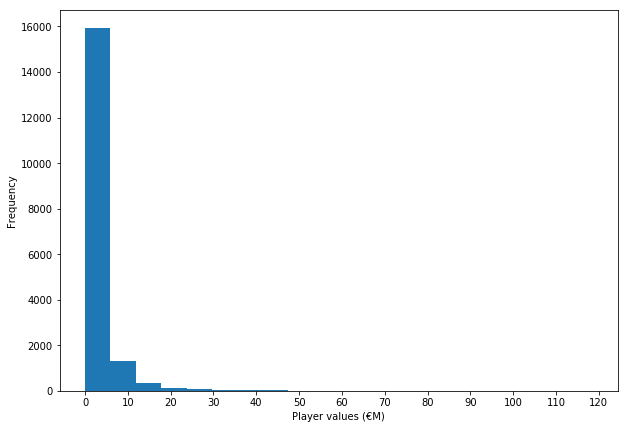

In [16]:
#Plot frequency of player value ranges in €5 million intervals
fig = plt.figure(figsize = (10,7))
#Use 20 bins of player values. Value divided by 10^6 so x-axis units are in millions
(players_with_value['Value']/10**6).plot.hist(bins = 20)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(np.arange(0,125,10))
plt.xlabel('Player values (€M)')
plt.show()

The stats and graph above clearly show that a huge number of players have a value of below €5M. These players are unlikely to be considered by top football clubs and will also heavily skew the training data in the KNN algorithm. Lets plot the chart above again for players valued above €5M

In [17]:
#Assign players with value > €5 million to new dataframe
above_5m = players_with_value[players_with_value['Value'] >= 5000000]

#Check no. players in new dataframe
print("Players with value above €5 000 000:" , len(above_5m))

Players with value above €5 000 000: 2302


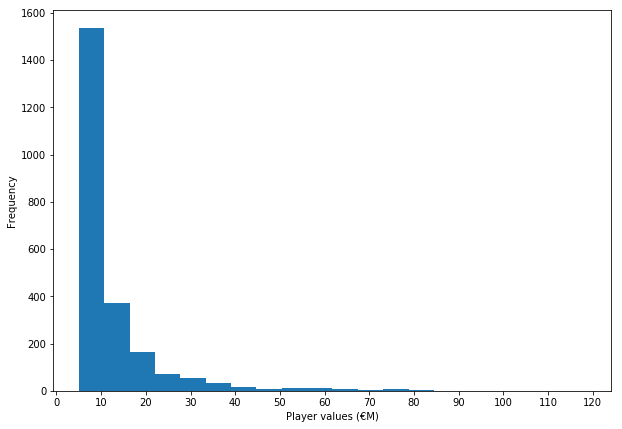

In [18]:
#Plot frequency of player value ranges above €5 million
fig = plt.figure(figsize = (10,7))
#Use 20 bins of player values. Value divided by 10^6 so x-axis units are in millions
(above_5m['Value']/10**6).plot.hist(bins = 20)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(np.arange(0,125,10))
plt.xlabel('Player values (€M)')
plt.show()

The chart above still shows the majority of the players have values below €15M but the range looks more realistic for the training of a KNN model. The cleaned dataset of players with values has been reduced from 17907 players to 2302 players with a value of €15M.

# 3. Convert numerical inforamtion stored as strings to correct data format
KNN can only measure how 'close' two numerical values are in the feature space. Since there are a number of columns with text data, these features will need to be converted to numerical data to be used with the KNN algorithm. 

In [19]:
#Define list of attributes that will be used for training.
attributes = list(above_5m.columns)
remove_attributes = ['Name','Age','Club','Special','Preferred Foot']
attributes = [attr for attr in attributes if attr not in remove_attributes]

#Check datatype of every column to identify which contain string values
above_5m[attributes].dtypes

Overall                       int64
Potential                     int64
Value                         int32
Wage                         object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Position                     object
Jersey Number               float64
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     

The 'Wage', 'Work Rate', 'Contract Valid Until', 'Height', 'Weight' and 'Release Clause' columns need to be either removed, cleaned and converted to text or be assigned numerical values based on the text data contained in the column. Lets have a look at the types of values in each of those columns to decide on how to proceed. Note the 'Position' column column also contains text data but this column will only be used to categorize players and not to predict their value.

In [20]:
#Print some of the data contained in columns containing text 
#to investigate how to convert these columns to integers
print("Unique values in text columns:")
print("Wage:", above_5m['Wage'][0:6])
print("Wage:", above_5m['Wage'].unique())
print("\nContract Valid Until:", above_5m['Contract Valid Until'].unique())
print("\nHeight:", above_5m['Height'].unique())
print("\nWeight:", above_5m['Weight'].unique())
print("\nRelease Clause:\n", above_5m['Release Clause'][0:5])

Unique values in text columns:
Wage: 0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
5    €340K
Name: Wage, dtype: object
Wage: ['€565K' '€405K' '€290K' '€260K' '€355K' '€340K' '€420K' '€455K' '€380K'
 '€94K' '€205K' '€125K' '€285K' '€225K' '€145K' '€240K' '€315K' '€200K'
 '€130K' '€300K' '€215K' '€100K' '€255K' '€165K' '€265K' '€160K' '€150K'
 '€245K' '€110K' '€115K' '€210K' '€195K' '€230K' '€250K' '€155K' '€180K'
 '€175K' '€190K' '€185K' '€21K' '€82K' '€73K' '€92K' '€77K' '€96K' '€170K'
 '€66K' '€235K' '€28K' '€105K' '€38K' '€81K' '€57K' '€15K' '€63K' '€22K'
 '€135K' '€84K' '€120K' '€90K' '€72K' '€93K' '€88K' '€45K' '€74K' '€51K'
 '€42K' '€31K' '€75K' '€25K' '€140K' '€41K' '€78K' '€53K' '€80K' '€43K'
 '€60K' '€85K' '€64K' '€67K' '€18K' '€70K' '€91K' '€20K' '€49K' '€87K'
 '€86K' '€26K' '€29K' '€55K' '€35K' '€33K' '€56K' '€30K' '€11K' '€59K'
 '€23K' '€46K' '€39K' '€32K' '€36K' '€54K' '€98K' '€68K' '€95K' '€58K'
 '€27K' '€40K' '€44K' '€19K' '€1K' '€61K' '€50K' '€99K' '€17K' '€52K

The data in the columns listed above will be handled as described below:

#### Wage
Similar to what was done with the 'Value' column earlier on, the Euro and 'K' characters will be removed. The scale of the number must first be correct (X1000 because of 'K' character) and can then be converted to an integer.

#### Work Rate
This column contains categorical data that can be converted to numerical values. This is handled in section 4 below.

#### Contract Valid Until
This column could be important since the length of a player's contract will greatly effect his value to the club. This column will therefore need to be converted into an integer. I will convert the date into a number of days from the current date. For simplicity, only the year will be used from this column

#### Height
Remove feet and inches characters and convert height to cm

#### Weight
remove 'lbs' text and convert to kg and float datatype

#### Release clause
Remove text characters and convert to float. Null values also exist in these columns so they will need to be replaced. Because of a lack of further information, null valus will be replaced by 0.   

In [21]:
import re
#Turn off SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn


#Remove € character from "Wage" column
above_5m['Wage'] = above_5m['Wage'].str.replace('€','')

#Remove K character from "Wage" column after multiplying to get correct order
above_5m['Wage'] = above_5m['Wage'].replace({'K':'000'}, 
                                            regex = True).map(pd.eval).astype(int)


#Extract only year in 'Contract Valid Until' column
pattern = r'(\d{4})'
years = above_5m['Contract Valid Until'].str.extract(pattern).copy()
above_5m['Contract Valid Until'] = years
above_5m['Contract Valid Until'] = above_5m['Contract Valid Until'].fillna(0).astype(int)

#Remove extra characters in "Weight" column
mass_lbs = above_5m['Weight'].str.replace('lbs','').astype(float)
above_5m['Weight'] = round(mass_lbs*0.453592,2)


#Remove text characters in "Release Clause" column and convert to float
above_5m['Release Clause'] = above_5m['Release Clause'].str.replace('€','').str.replace(
    'M','').str.replace('K','').astype(float)
above_5m['Release Clause'] = above_5m['Release Clause'].fillna(0)

#Convert height to cm
feet_inches = above_5m['Height'].str.split("'",expand = True).astype(int)
cm = feet_inches[0]*30.48 + feet_inches[1]/12*30.48
above_5m['Height'] = cm

above_5m.head(10)

,Name,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,FC Barcelona,110500000,565000,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,2021,170.18,72.12,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,Cristiano Ronaldo,33,94,94,Juventus,77000000,405000,2228,Right,5.0,4.0,5.0,High/ Low,ST,7.0,2022,187.96,83.01,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,Neymar Jr,26,92,93,Paris Saint-Germain,118500000,290000,2143,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,2022,175.26,68.04,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,De Gea,27,91,93,Manchester United,72000000,260000,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,2020,193.04,76.20,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,K. De Bruyne,27,91,92,Manchester City,102000000,355000,2281,Right,4.0,5.0,4.0,High/ High,RCM,7.0,2023,180.34,69.85,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4
5,E. Hazard,27,91,91,Chelsea,93000000,340000,2142,Right,4.0,4.0,4.0,High/ Medium,LF,10.0,2020,172.72,73.94,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
6,L. Modrić,32,91,91,Real Madrid,67000000,420000,2280,Right,4.0,4.0,4.0,High/ High,RCM,10.0,2020,172.72,66.22,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4
7,L. Suárez,31,91,91,FC Barcelona,80000000,455000,2346,Right,5.0,4.0,3.0,High/ Medium,RS,9.0,2021,182.88,86.18,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164.0
8,Sergio Ramos,32,91,91,Real Madrid,51000000,380000,2201,Right,4.0,3.0,3.0,High/ Medium,RCB,15.0,2020,182.88,82.10,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6
9,J. Oblak,25,90,93,Atlético Madrid,68000000,94000,1331,Right,3.0,3.0,1.0,Medium/ Medium,GK,1.0,2021,187.96,87.09,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144.5


# 4. Assign numerical information to categorical data
As mentioned in section (3), the work rate column contains categorical information that can be converted to numerical data. The values in this column are either 'Low', 'Medium' or 'High'. To allow easy use of the KNN algorithm, these values will be converted into integers (1 for Low, 3 for High). 

According to [this](https://www.reddit.com/r/FIFA/comments/3znwub/beginners_guide_work_rates/) webpage, each player has an attacking and defensive work rate separated by a slash. The format of the work rate is given as attacking/defensive. Since there are two values given in this column, the final work rate will then be taken as the average of a player's attacking and defensive work rates.

In [22]:
# #Assign numerical values to 'Work Rate' column
work_rate_cleanup = {'Low/ Low': (1+1)/2, 'Low/ Medium': (1+2)/2,'Medium/ Low':(2+1)/2,
                     'Low/ High':(1+3)/2,'High/ Low':(3+1)/2, 'Medium/ Medium': (2+2)/2, 
                     'High/ Medium': (3+2)/2, 'Medium/ High': (2+3)/2, 'High/ High': (3+3)/2}

above_5m['Work Rate'].replace(work_rate_cleanup, inplace = True)


## Data cleaning complete!
There are now no rows with missing information. Lets confirm the length of the updated dataframe and preview it:

# 5. Normalization
If all values in the dataframe had the same scale, normalization would not be necessary. In this case, most columns are on a 0-100 scale but some are not. The conversion of 'Work Rate' and 'Contract Valid Until' columns in the cell above result in two examples of columns that are not on the 0-100 scale.

In order to use KNN accurately, the data fed in to the algorithm must be on the same scale so lets normalize the dataframe:

In [23]:
#List of columns that won't be normalized
non_data_cols = ['Name','Club','Position','Wage', 'Preferred Foot', 'Value']
#Create normalized dataframe with columns to be normalized for players valued above €5M
normalized_attributes = [attr for attr in above_5m.columns if attr not in non_data_cols]
normalized = above_5m[normalized_attributes]

#Do the normalization
normalized = (normalized - normalized.min()) / (
    normalized.max() - normalized.min())

#Add columns that were removed before normalization back to the dataframe
normalized = pd.concat([above_5m[non_data_cols],normalized], axis = 1)

#Preview normalized dataframe
normalized.head()

,Name,Club,Position,Wage,Preferred Foot,Value,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Jersey Number,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,FC Barcelona,RF,565000,Left,110500000,0.70,1.000000,0.952381,0.889486,1.00,0.75,0.75,0.333333,0.091837,0.375,0.294118,0.346121,0.895349,1.000000,0.724138,0.963415,0.951807,1.000000,0.988235,1.000000,0.926829,1.000000,0.920000,0.857143,0.935065,0.977778,0.986842,0.879518,0.590909,0.692308,0.470588,1.000000,0.440476,0.176471,0.989011,1.000000,0.795181,1.000000,0.302326,0.244186,0.216867,0.056180,0.109890,0.155556,0.147727,0.075269,0.992986
1,Cristiano Ronaldo,Juventus,ST,405000,Right,77000000,0.80,1.000000,0.952381,0.909440,1.00,0.75,1.00,0.333333,0.061224,0.500,0.705882,0.576939,0.895349,0.988889,0.942529,0.853659,0.963855,0.898876,0.847059,0.793103,0.804878,0.977011,0.893333,0.928571,0.883117,1.000000,0.657895,1.000000,1.000000,0.897436,0.764706,0.988636,0.619048,0.258824,1.000000,0.855422,0.915663,0.986842,0.244186,0.279070,0.180723,0.067416,0.109890,0.155556,0.147727,0.107527,0.557212
2,Neymar Jr,Paris Saint-Germain,LW,290000,Right,118500000,0.45,0.913043,0.904762,0.844206,1.00,1.00,1.00,0.666667,0.091837,0.500,0.411765,0.259644,0.837209,0.911111,0.632184,0.890244,0.927711,0.988764,0.929412,0.919540,0.817073,0.988506,0.960000,0.914286,1.000000,0.955556,0.842105,0.819277,0.484848,0.807692,0.323529,0.863636,0.535714,0.341176,0.934066,0.915663,0.867470,0.973684,0.232558,0.197674,0.301205,0.089888,0.087912,0.155556,0.159091,0.107527,1.000000
3,De Gea,Manchester United,GK,260000,Right,72000000,0.50,0.869565,0.904762,0.328473,0.75,0.50,0.00,0.333333,0.000000,0.250,0.823529,0.432599,0.116279,0.088889,0.160920,0.475610,0.072289,0.112360,0.141176,0.137931,0.487805,0.379310,0.466667,0.457143,0.532468,0.866667,0.302632,0.228916,0.575758,0.320513,0.544118,0.068182,0.321429,0.270588,0.087912,0.686747,0.373494,0.631579,0.093023,0.162791,0.060241,1.000000,0.923077,0.955556,0.988636,1.000000,0.607628
4,K. De Bruyne,Manchester City,RCM,355000,Right,102000000,0.50,0.869565,0.857143,0.950115,0.75,1.00,0.75,1.000000,0.061224,0.625,0.529412,0.298008,1.000000,0.855556,0.551724,0.987805,0.903614,0.876404,0.894118,0.873563,0.975610,0.942529,0.746667,0.714286,0.779221,0.888889,0.750000,0.951807,0.515152,0.923077,0.705882,0.965909,0.773810,0.635294,0.912088,1.000000,0.843373,0.894737,0.709302,0.593023,0.518072,0.157303,0.131868,0.044444,0.102273,0.129032,0.861026


# 6. Categorize players into new dataframes according to position
The players in the dataset can now be assigned to separate 'forwards', 'midfielders', 'defenders' and 'goalkeepers' dataframes which will be used independently to train models according to each of the four position categories.

In [24]:
#Preview unique positions in dataframe in order to isolate according to each dataframe
positions = normalized['Position'].unique()
positions

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

The players categorization of players according to the position is guided by [this](https://fifafootballvideogames.fandom.com/wiki/Soccer_positions) webpage. The categorization approach is summarized in the table below:

|Position (Abbreviated)|Position|Category|
|---|---|---|
|LS|Left Striker|Forward|
|ST|Striker|Forward|
|RS|Right Striker|Forward|
|LF|Left Forward|Forward|
|CF|Centre Forward|Forward|
|RF|Right Forward|Forward|
|LAM|Left Attacking Midfielder|Midfielder|
|CAM|Central Attacking Midfielder|Midfielder|
|RAM|Right Attacking Midfielder|Midfielder|
|LW|Left Wing|Midfielder|
|RW|Right Wing|Midfielder|
|LM|Left Midfielder|Midfielder|
|LCM|Left Centre Midfielder|Midfielder|
|CM|Centre Midfielder|Midfielder|
|RCM|Right Centre Midfielder|Midfielder|
|RM|Right Midfielder|Midfielder|
|LDM|Left Defensive Midfielder|Midfielder|
|CDM|Centre Defensive Midfielder|Midfielder|
|RDM|Right Defensive Midfielder|Midfielder|
|LWB|Left Wingback|Defender|
|RWB|Right Wingback|Defender|
|LB|Left Back|Defender|
|LCB|Left Centre Back|Defender|
|CB|Centre Back|Defender|
|RCB|Right Centre Back|Defender|
|RB|Right Back|Defender|
|GK|Goalkeeper|Goalkeeper|


In [25]:
#Lists of positions in each category
list_forwards = ['LS','ST','RS','LF','CF','RF']
list_midfielders = ['LAM','CAM','RAM','LW','RW','LM','LCM','CM','RCM','RM','LDM','CDM','RDM']
list_defenders = ['LWB','RWB','LB','LCB','RCB','RB']
list_goalkeepers = ['GK']

#Create new dataframes of players categorised according to position
forwards = normalized[normalized['Position'].isin(list_forwards)]
midfielders = normalized[normalized['Position'].isin(list_midfielders)]
defenders = normalized[normalized['Position'].isin(list_defenders)]
goalkeepers = normalized[normalized['Position'].isin(list_goalkeepers)] 

The players have now been isolated into separate dataframes according to their position on the field. Out of interest, lets see how many players are in each of these dataframes.

In [26]:
print('Number of forwards:',len(forwards))
print('Number of midfielders:',len(midfielders))
print('Number of defenders:',len(defenders))
print('Number of goalkeepers:',len(goalkeepers))

Number of forwards: 384
Number of midfielders: 1142
Number of defenders: 474
Number of goalkeepers: 157


# 7. Identify 10 most relevant attributes for predicting player value
The 10 attributes that most accurately predict a player's value will be determined for each category. 

The number of features to use could be optimised by checking the RMSE value associated with each number of attributes. Using this method, the attributes should be added to the test in order of their individual accuracy. This method would add complexity and is not explored in this code.

## Function for K-Nearest Neighbours Algorithm
A function to find the RMS value for a given feature using the KNN algorithm is defined below. This function therefore represents a univariate KNN algorithm and will be used to determine the most accurate price predictors for each category of players

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#Define function for KNN. Target column does not need to be an argument since it
#is always going to be the 'Value' column
def KNN_uni(df, train_col):
    knn = KNeighborsRegressor()
        
    #Randomize dataframe
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    #Train using training column sent to function
    knn.fit(df[[train_col]],df['Value'])
    
    #Predict using trained model
    predictions = knn.predict(df[[train_col]])
    
    #Calculate RMSE
    mse = mean_squared_error(df['Value'], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

## Run univariate KNN for each attribute and each category of player
The code below will run the KNN algorithm defined in the code cell above to determine the RMSE value by using every attribute in the dataframe to predict a player's price. 

The code could be greatly improved by logically selecting which features to use for predictions based on each category of player (Goalkeeping Reflexes would not be a useful attribute for predicting the value of a striker). In the interest of making progress in the code, I will assume the user has no knowledge of which attributes are useful for each position and simply use them all.

In [28]:
#Assign all column names to attributes variable
attributes = list(normalized.columns)

#Remove unwanted but potentially useful data columns from 
#attributes to creat list of coulmns for training
remove_attributes = ['Name','Age','Value','Club','Special','Wage','Preferred Foot','Position']
train_attributes = [attr for attr in attributes if attr not in remove_attributes]

#Function to determine RMSE for each attribute
def get_RMSE(dataframe):
    #Create dictionary of RMSE value associated with each attribute
    RMSEs = {}
    for attribute in train_attributes:
        rmse = KNN_uni(dataframe,attribute)
        RMSEs[attribute] = rmse
    
    #Create tuple of dictionary so that it can be sorted according to RMSE
    rmse_tuple = RMSEs.items()
    rmse_tuple = sorted(rmse_tuple,key=lambda x: x[1])
    
    #Create and return dataframe of top 10 predictors 
    top_10 = pd.DataFrame(rmse_tuple[0:10], columns = ['Attribute','RMSE'])
    return top_10

#Run get_RMSE function to get RMSE value for each category of player
top_10_forwards = get_RMSE(forwards)
top_10_midfielders = get_RMSE(midfielders)
top_10_defenders = get_RMSE(defenders)
top_10_goalkeepers = get_RMSE(goalkeepers)       

In [29]:
#Check number of attributes that were used to train the model

In [30]:
print(len(train_attributes))

45


In [31]:
#Use display() function to display dataframes as tables
print("Top 10 predictors for forwards:")
display(top_10_forwards)
print("===============================")

print("\nTop 10 predictors for midfielders:")
display(top_10_midfielders)
print("===============================")

print("\nTop 10 predictors for defenders:")
display(top_10_defenders)
print("===============================")

print("\nTop 10 predictors for goalkeepers:")
display(top_10_goalkeepers)
print("===============================")

Top 10 predictors for forwards:


,Attribute,RMSE
0,Overall,3.854556e+06
1,Release Clause,5.008404e+06
2,Potential,6.231675e+06
3,Reactions,6.897484e+06
4,Finishing,8.159895e+06
5,Positioning,8.225516e+06
6,BallControl,8.744278e+06
7,Composure,9.905114e+06
8,Volleys,1.012472e+07
9,Dribbling,1.028431e+07



Top 10 predictors for midfielders:


,Attribute,RMSE
0,Overall,3.650690e+06
1,Potential,6.941249e+06
2,Release Clause,6.941572e+06
3,BallControl,6.970528e+06
4,Reactions,7.182016e+06
5,Vision,8.300118e+06
6,Positioning,8.623115e+06
7,ShortPassing,8.924146e+06
8,Dribbling,8.928943e+06
9,Composure,8.964577e+06



Top 10 predictors for defenders:


,Attribute,RMSE
0,Release Clause,1.609158e+06
1,Overall,3.257296e+06
2,Potential,4.281890e+06
3,StandingTackle,5.037220e+06
4,Reactions,5.437761e+06
5,Interceptions,5.535886e+06
6,SlidingTackle,5.579771e+06
7,Marking,5.786108e+06
8,Composure,6.324737e+06
9,Crossing,7.094801e+06



Top 10 predictors for goalkeepers:


,Attribute,RMSE
0,Release Clause,2.124411e+06
1,Overall,3.515616e+06
2,Potential,4.942652e+06
3,Reactions,5.238399e+06
4,GKReflexes,5.924724e+06
5,GKHandling,6.182289e+06
6,GKDiving,6.821005e+06
7,GKPositioning,7.020657e+06
8,Composure,7.861711e+06
9,International Reputation,8.789452e+06


In [32]:
#Create list of top 10 attributes for each category from the relevant dataframes

fwd_predictors = top_10_forwards['Attribute'].tolist()
mid_predictors = top_10_midfielders['Attribute'].tolist()
def_predictors = top_10_defenders['Attribute'].tolist()
gk_predictors = top_10_goalkeepers['Attribute'].tolist()

# 8. Predict player value using KNN
The top 10 attributes to predict the value of players in each category have now been determined. To test the accuracy of using just these 10 attributes to predict the price of each player, lets assume the price of each player was not known and predict their value based on the KNN model.

In [33]:
#Define KNN function to predict player value based on top 10 relevant attributes
def knn_predict(dataframe,predictors):
    knn = KNeighborsRegressor()
 
    #Train using set of attributes sent to function
    knn.fit(dataframe[predictors],dataframe['Value'])
    
#     Run prediction of player value using set of attributes sent to function.
#     Add these predicted values as well as the error compared to the 
#     true FIFA 19 value to a new dataframe
    
    predicted = dataframe[['Name','Value']]
    predicted['Predicted'] = knn.predict(dataframe[predictors])
    predicted['% Difference'] = round(((predicted['Value']-predicted['Predicted'])/predicted['Value'])*100,2)
    
    #Return predicted values sorted by % difference to FIFA 19 value
    return(predicted.sort_values('% Difference', ascending = False))

fwd_prices = knn_predict(forwards,fwd_predictors)
mid_prices = knn_predict(midfielders,mid_predictors)
def_prices = knn_predict(defenders,def_predictors)
gk_prices = knn_predict(goalkeepers,gk_predictors)                      

# 9. Data Visualization
Predictions have been made using the 10 best predictive features of player value for the dataset. Lets now plot the % difference between the predicted value and the actual FIFA 19 value to visualize the accuracy of using 10 features to predict a player's value

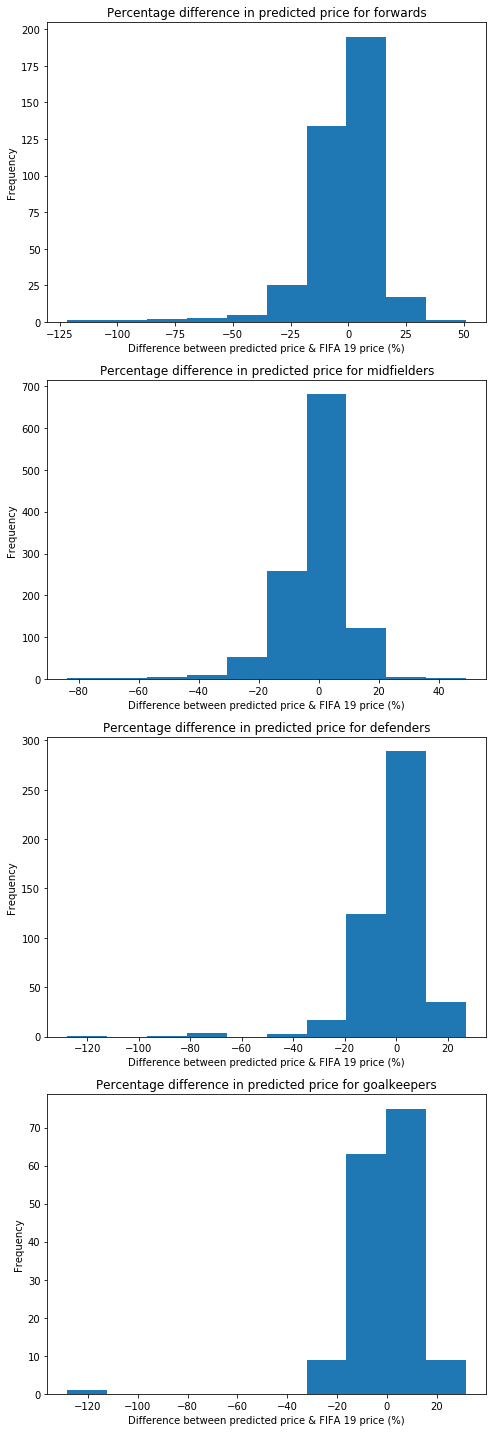

In [34]:
fig = plt.figure(figsize = (7,20))

#Function to plot % Difference column for dataframe sent to function
def plot(dataframe,category,plot_pos):
    ax = fig.add_subplot(4,1,plot_pos)
    ax.hist(dataframe['% Difference'])
    ax.set_xlabel('Difference between predicted price & FIFA 19 price (%)')
    ax.set_ylabel('Frequency')
    ax.set_title('Percentage difference in predicted price for ' + category)
    fig.tight_layout()

#Create plots for each dataframe
plot(fwd_prices,'forwards',1)
plot(mid_prices,'midfielders',2)
plot(def_prices,'defenders',3)
plot(gk_prices,'goalkeepers',4)

# Statistics 
The charts above show surprisingly good accuracy is achieved when predicting a player's value using the top 10 attributes that were identified for each category in step step 7. The prediction of value for all categories resulted in a normal distrbution centred near a 0% difference between predicted value and FIFA 19 value.

Lets have a look at the summary statistics for the % Difference between predicted value and FIFA 19 for each category:

In [35]:
print("""Summary stats for % Difference between value predicted using top 10 features
and FIFA 19 value:""")

for i,j in (fwd_prices,'Forwards'), (mid_prices,'Midfielders'), (
    def_prices,'Defenders'), (gk_prices,'Goalkeepers'):
    print("\n=========================================================================")
    print(j)
    print("=========================================================================")
    display(i['% Difference'].describe().to_frame())

Summary stats for % Difference between value predicted using top 10 features
and FIFA 19 value:

Forwards


,% Difference
count,384.000000
mean,-1.629766
std,15.680245
min,-121.670000
25%,-6.062500
50%,0.000000
75%,6.670000
max,51.050000



Midfielders


,% Difference
count,1142.000000
mean,-1.051331
std,11.468648
min,-83.750000
25%,-5.000000
50%,0.110000
75%,5.260000
max,49.210000



Defenders


,% Difference
count,474.000000
mean,-1.500295
std,13.614659
min,-127.780000
25%,-5.590000
50%,0.000000
75%,5.330000
max,27.200000



Goalkeepers


,% Difference
count,157.000000
mean,-0.787070
std,14.685013
min,-128.330000
25%,-6.000000
50%,0.000000
75%,6.670000
max,31.790000


From the stats above we can see that, in general, a player's value can be predicted fairly accurately using just 10 of the 45 attributes that were used in the univariate KNN model earlier on.

# Conclusion
In this project, the value of players categorized as forwards, midfielders, defenders and goalkeepers in FIFA 19 was predicted using just 10 out of 45 player attributes. 

It was found that just 10 relevant features is enough to accurately predict the value of a player in the game. The average difference between the predicted value and actual value in FIFA 19 is summarized for each category below:

|Category|% Difference (Predicted vs FIFA 19)|
|---|---|
|Forwards|-1.63|
|Midfielders|-1.05|
|Defenders|-1.50|
|Goalkeepers|0.78|

This project has been incredibly valuable practice in data cleaning, pandas, KNN and matplotlib. As mentioned in the introduction, this project will be revisited in future to compare the accuracy of predictions made using KNN vs linear regression.

With better knowledge about the implementation of KNN, I now intend to build a model to analyze which attributes of stainless steel components designed at my current job contribute to their cost most significantly. This information can  be used to a) reduce the complexity of our designs to reduce cost and b) predict the cost of a component based on its design features.